In [30]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

## 데이터 호출

(60000, 28, 28)
(60000, 28, 28, 1)
60000 train samples
10000 test samples


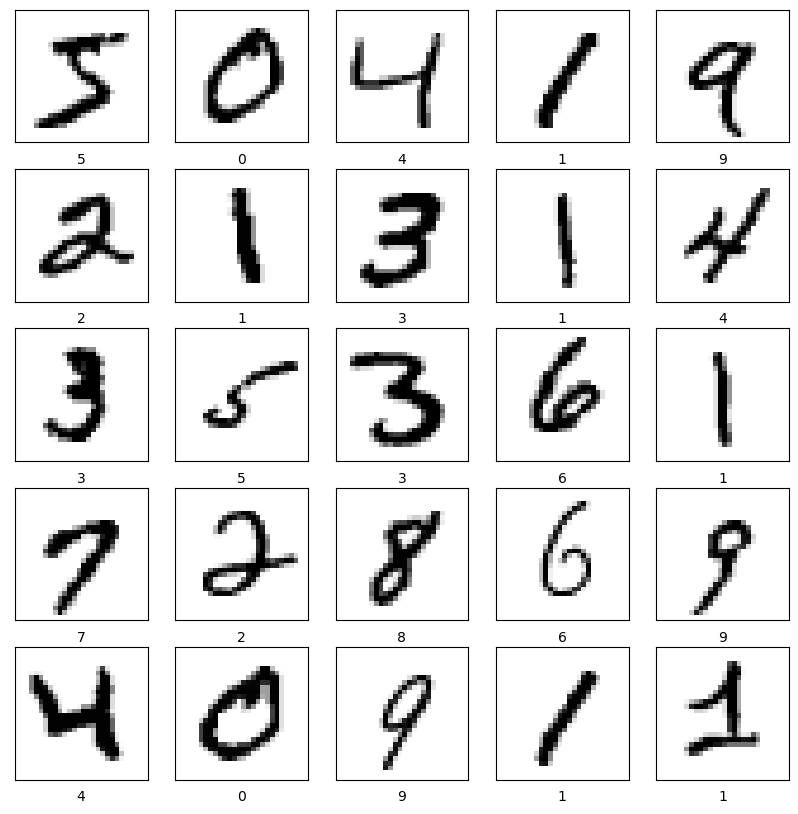

In [42]:
#모델,데이터 파라미터
num_classes = 10
input_shape=(28,28,1)

#데이터
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

#스케일링
x_train = x_train.astype("float32") /255
x_test = x_test.astype("float32") /255

print(x_train.shape)
#shape (28,28,1)으로 변경 
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

y_train_en = keras.utils.to_categorical(y_train, num_classes)
y_test_en = keras.utils.to_categorical(y_test,num_classes)


class_names=[
    "0","1","2","3","4","5","6","7","8","9"
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [43]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [44]:
batch_size = 129
epochs =15
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train_en,batch_size=batch_size,epochs=epochs, validation_split=0)

Epoch 1/15
466/466 [==============================] - 2s 4ms/step - loss: 0.3499 - accuracy: 0.8939
Epoch 2/15
466/466 [==============================] - 2s 4ms/step - loss: 0.1111 - accuracy: 0.9661
Epoch 3/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0850 - accuracy: 0.9733
Epoch 4/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 5/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0623 - accuracy: 0.9805
Epoch 6/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0559 - accuracy: 0.9831
Epoch 7/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9841
Epoch 8/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 9/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0445 - accuracy: 0.9859
Epoch 10/15
466/466 [==============================] - 2s 4ms/step - loss: 0.0432 - accuracy: 0.9865

## 예측 하기

In [45]:
score = model.evaluate(x_test,y_test_en,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:", score[1])

Test loss: 0.02487776055932045
Test accuracy: 0.9921000003814697


In [49]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


7

## 예측을 그래프로 시각화

In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

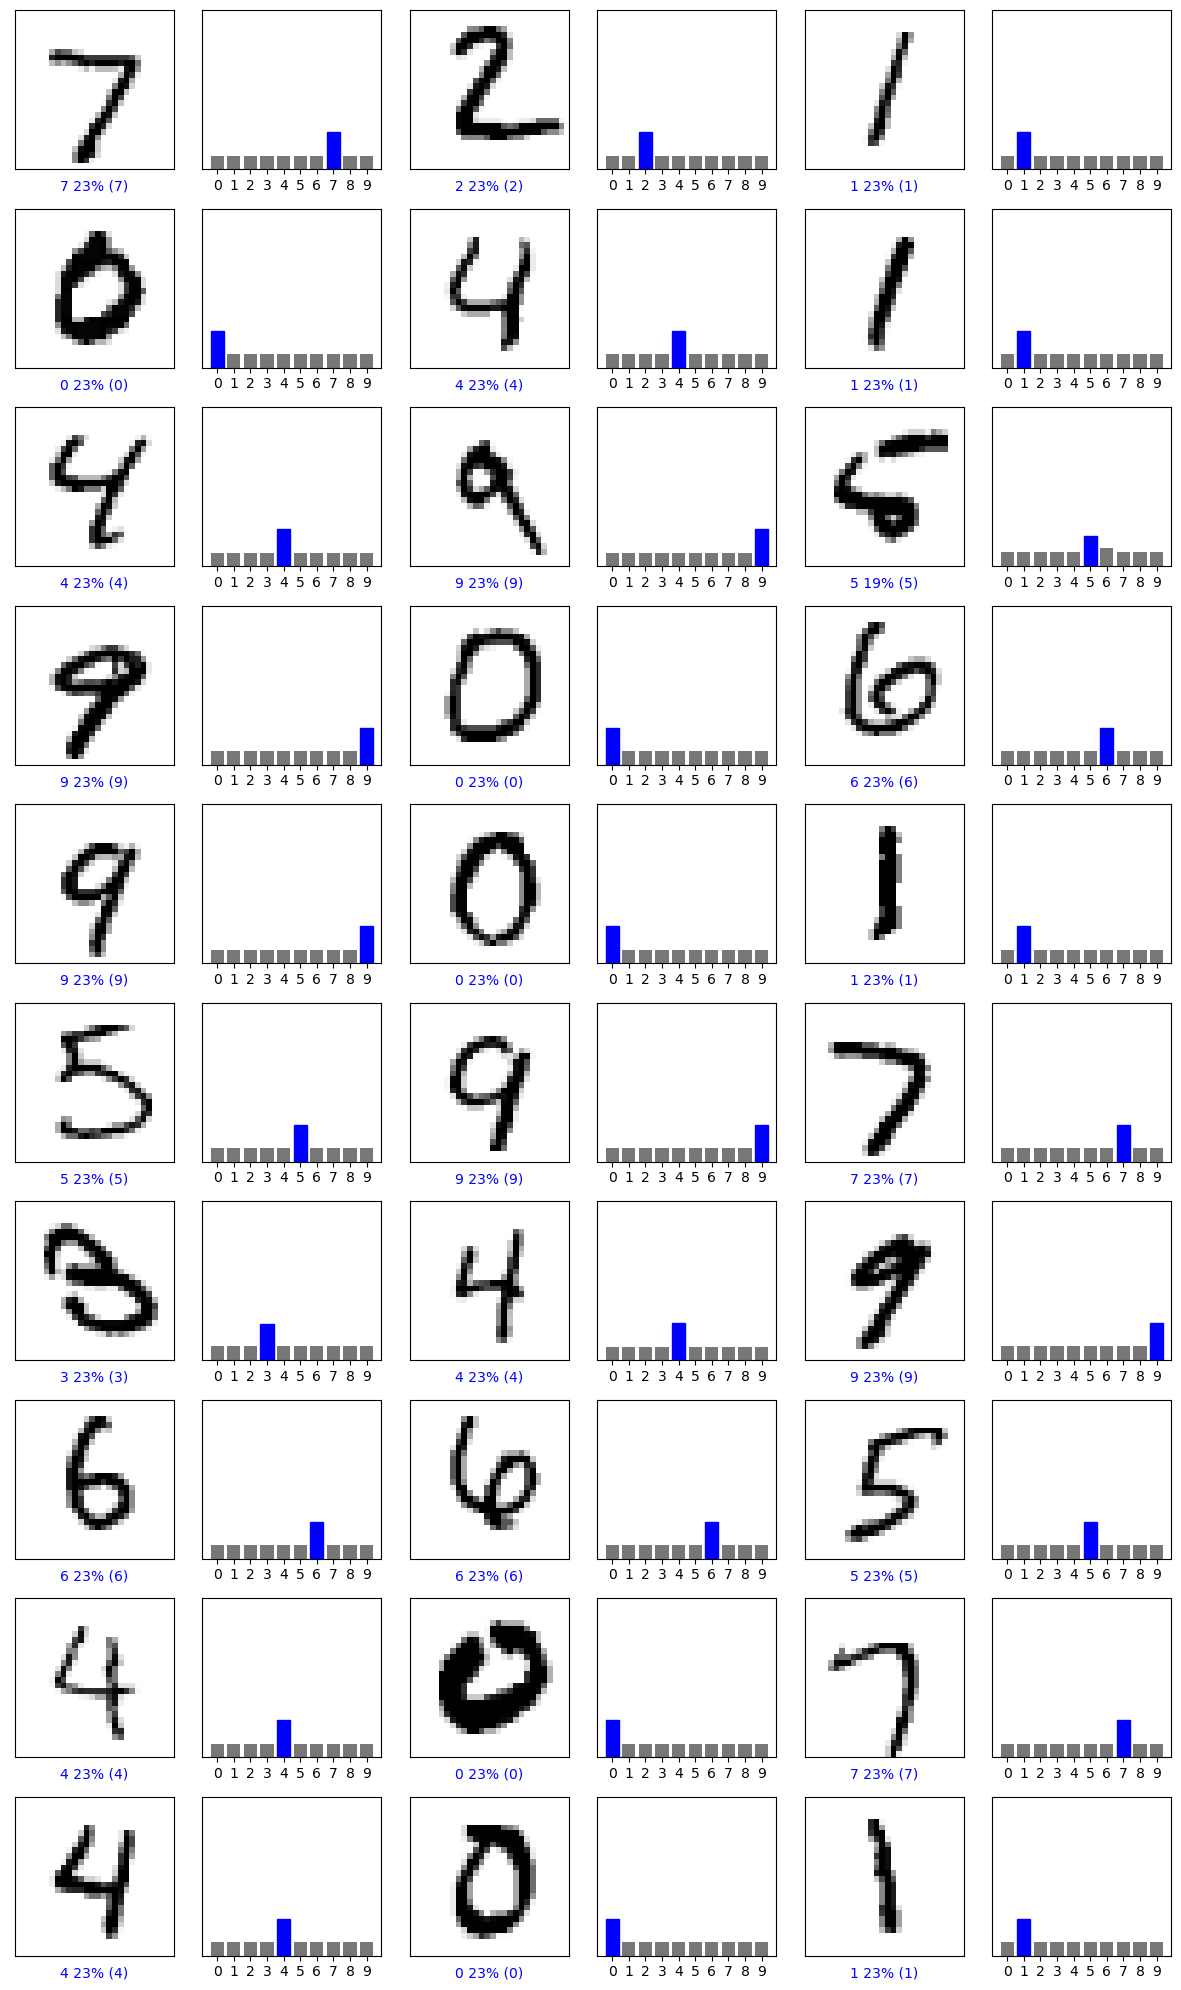

In [55]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()